Probabilitas nasabah sudah menikah: 64.82%
Probabilitas menikah, tinggal di urban, tanggungan > 1: 7.33%
Distribusi pendidikan:
Education
Graduate        0.781759
Not Graduate    0.218241
Name: proportion, dtype: float64


<ipython-input-7-787efeca50bc>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Dependents'] = df['Dependents'].replace('3+', 3).astype(float)


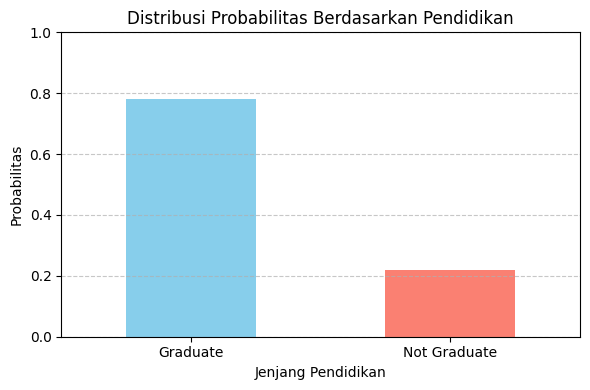

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca file Excel yang sudah di-upload
df = pd.read_excel("loan_data_set.xlsx")

# a. Probabilitas nasabah sudah menikah
married_prob = (df['Married'] == 'Yes').mean()
print(f"Probabilitas nasabah sudah menikah: {married_prob:.2%}")

# b. Probabilitas nasabah menikah, tinggal di kawasan perkotaan, dan tanggungan > 1
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(float)
filtered_b = df[(df['Married'] == 'Yes') &
                (df['Property_Area'] == 'Urban') &
                (df['Dependents'] > 1)]
prob_b = len(filtered_b) / len(df)
print(f"Probabilitas menikah, tinggal di urban, tanggungan > 1: {prob_b:.2%}")

# c. Probabilitas berdasarkan jenjang pendidikan
edu_probs = df['Education'].value_counts(normalize=True)
print("Distribusi pendidikan:")
print(edu_probs)

# Visualisasi distribusi pendidikan
plt.figure(figsize=(6, 4))
edu_probs.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribusi Probabilitas Berdasarkan Pendidikan')
plt.ylabel('Probabilitas')
plt.xlabel('Jenjang Pendidikan')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




In [8]:
from google.colab import files
uploaded = files.upload()


Saving data_pasien2.csv to data_pasien2.csv


a. Probabilitas sakit jika hasil tes positif: 47.93%
b. Probabilitas tidak sakit jika hasil tes negatif: 53.78%


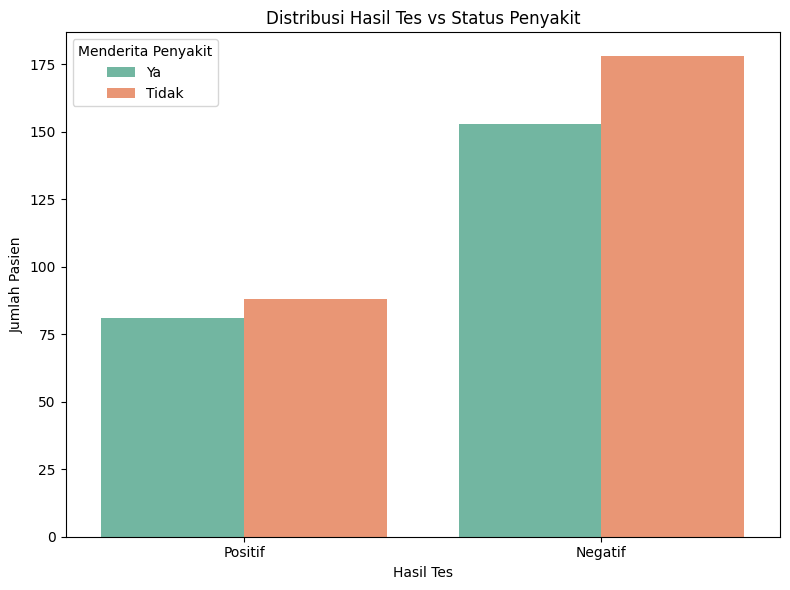

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Membaca data
df = pd.read_csv("data_pasien2.csv", sep=';')  # Pastikan file berada di direktori yang sama

# 2. Membuat confusion matrix
conf_matrix = pd.crosstab(df['Hasil_Tes'], df['Menderita_Penyakit'])

# Ambil nilai untuk perhitungan
positif_ya = conf_matrix.loc['Positif', 'Ya']
positif_tidak = conf_matrix.loc['Positif', 'Tidak']
negatif_ya = conf_matrix.loc['Negatif', 'Ya']
negatif_tidak = conf_matrix.loc['Negatif', 'Tidak']

# 3. Hitung probabilitas
prob_positif_dan_sakit = positif_ya / (positif_ya + positif_tidak)
prob_negatif_dan_tidak_sakit = negatif_tidak / (negatif_tidak + negatif_ya)

print(f"a. Probabilitas sakit jika hasil tes positif: {prob_positif_dan_sakit:.2%}")
print(f"b. Probabilitas tidak sakit jika hasil tes negatif: {prob_negatif_dan_tidak_sakit:.2%}")

# 4. Visualisasi distribusi
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Hasil_Tes', hue='Menderita_Penyakit', palette='Set2')
plt.title('Distribusi Hasil Tes vs Status Penyakit')
plt.xlabel('Hasil Tes')
plt.ylabel('Jumlah Pasien')
plt.legend(title='Menderita Penyakit')
plt.tight_layout()
plt.show()
